<a href="https://colab.research.google.com/github/malakmlk/IGL/blob/master/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE TSP SOLUTION USING DFS



Le cout optimal est : 100
Le chemin hamiltonien:  [(1, 4), (4, 2), (2, 5), (5, 3), (3, 6), (6, 1)]
Le temps d'execution: 0.0008096694946289062 seconds 


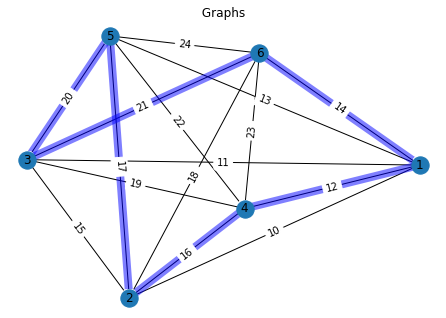

In [ ]:
#@title
# Python3 program to implement traveling salesman 
# problem using naive approach. 
from sys import maxsize 
from itertools import permutations
import time
import networkx as nx
import matplotlib.pyplot as plt

V = 6
m = 0
# implementation of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
    list=[]
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
            
 
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    
    for i in next_permutation:
 
        # store current Path weight(cost) 
        current_pathweight = 0
        
        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight+= graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 
 
        # update minimum 
        if (min_path>current_pathweight):
             list=[x+1 for x in i]
             
        min_path = min(min_path, current_pathweight) 
    return min_path,list
 
# Driver Code 
if __name__ == "__main__": 
    start_time = time.time()
    # matrix representation of graph 
    graph = [[0, 10, 11, 12,13,14],
             [10, 0, 15, 16,17,18], 
             [11, 15, 0, 19,20,21],
             [12, 16, 19, 0,22,23],
             [13,17,20,22,0,24],
             [14,18,21,23,24,0]] 
    s = 0
    maxpath,list=travellingSalesmanProblem(graph, s)
    print("Le cout optimal est :", maxpath)
    path=[]
    path.append((s+1,list[0]))
    for i in range(len(list)-1):
      path.append((list[i],list[i+1]))
    path.append((list[i+1],s+1))
    print("Le chemin hamiltonien: ",path)
    print("Le temps d'execution: %s seconds " % (time.time() - start_time))
    G = nx.Graph()
    i=0
    j=0
    for i in range(len(graph)):
      l=graph[i]
      for j in range(len(l)):
        G.add_edge(i+1,j+1,color='r',weight=l[j])
      j=0

    pos = nx.spring_layout(G)
    weights = nx.get_edge_attributes(G, "weight")
    nx.draw(G,pos, with_labels=True)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=path,
        width=8,
        alpha=0.5,
        edge_color="b",
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.title(" Graphs ")
    plt.gcf().canvas.set_window_title("")
    plt.show()

# TSP SOLUTION USING HEURISTIC

Le cout optimal est : 104
Le chemin hamiltonien:  [(1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)]
Le temps d'execution: 0.0005271434783935547 seconds 


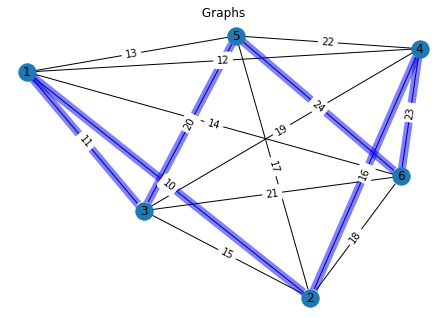

In [ ]:
#@title
#creer la structure 

from collections import defaultdict 

graph = [[0, 10, 11, 12, 13, 14],
             [10, 0, 15, 16,17,18], 
             [11, 15, 0, 19,20,21],
             [12, 16, 19, 0,22,23],
             [13,17,20,22,0,24],
             [14,18,21,23,24,0]] 

dict_graph = {}
for i in range(len(graph)):
  for j in range(i+1,len(graph[i])):
    if graph[i][j] in dict_graph.keys():

      dict_graph[graph[i][j]].append((i,j))
    else:
      dict_graph[graph[i][j]] = [(i,j)]

sorted_dict = {k: dict_graph[k] for k in sorted(dict_graph)}
result_graph = []
route_length = 0
degrees = {}

def cycle_test(arc):
  accepted = True
  contin = True
  current = arc[1]
  visited = []
  while contin:
    contin = False
    for a in result_graph:
      if not(a in visited) and (current in a):
        if current == a[1]:
            current = a[0]
        else:
            current = a[1]
        contin = True
        visited.append(a)
        if current==arc[0]:
          contin = False
          if len(result_graph) != len(graph)-1:
            accepted = False
  return accepted

def degree_test(arc):
  for v in arc:
    if v in degrees.keys():
      if(degrees[v] < 2):
        return True
      else:
        return False
    else:
      return True
start_time = time.time()
for k in sorted_dict:
  for arc in sorted_dict[k]:
    if degree_test(arc) and cycle_test(arc):
      for v in arc:
        if v in degrees.keys():
          degrees[v] += 1
        else:
          degrees[v] = 1
      route_length += k
      result_graph.append(arc)
path = []
for arc in result_graph:
  path.append((arc[0]+1,arc[1]+1))

print("Le cout optimal est :", route_length)
print("Le chemin hamiltonien: ",path)
print("Le temps d'execution: %s seconds " % (time.time() - start_time))

G1 = nx.Graph()
i=0
j=0
for i in range(len(graph)):
  l=graph[i]
  for j in range(len(l)):
    G.add_edge(i+1,j+1,color='r',weight=l[j])
  j=0
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw(G,pos, with_labels=True)
nx.draw_networkx_edges(
  G,
  pos,
  edgelist=path,
  width=8,
  alpha=0.5,
  edge_color="b"
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title(" Graphs ")
plt.gcf().canvas.set_window_title("")
plt.show()